In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline

In [4]:
list_names_Robert = []
list_names_Ruth = []
with_year = 1900
by_year = 2000
for i in range(with_year, by_year):
    path_to_file = os.path.join(os.getcwd(), 'names/yob' + str(i) + '.txt' )
    names = pd.read_csv(path_to_file, names = ['Name','Gender','Count'])
    names_Ruth = (names[names.Name == 'Ruth'])
    names_Robert = (names[names.Name == 'Robert'])
    names_Ruth.Count.sum()
    print(names_Ruth.Count.sum())
    print(names_Ruth)
      
    
#     names_Ruth = (names[names.Name == 'Ruth'])
    names_Robert = (names[names.Name == 'Robert'])
#     list_names_Robert.append(names_Robert)
#     list_names_Ruth.append(names_Ruth)
# print(list_names_Robert)
# print(list_names_Ruth)




4781
      Name Gender  Count
4     Ruth      F   4765
2868  Ruth      M     16
3989
      Name Gender  Count
4     Ruth      F   3974
2470  Ruth      M     15
4401
      Name Gender  Count
4     Ruth      F   4384
2574  Ruth      M     17
4531
      Name Gender  Count
4     Ruth      F   4518
2733  Ruth      M     13
4915
      Name Gender  Count
4     Ruth      F   4900
2773  Ruth      M     15
5088
      Name Gender  Count
4     Ruth      F   5068
2755  Ruth      M     20
5159
      Name Gender  Count
4     Ruth      F   5140
2761  Ruth      M     19
5588
      Name Gender  Count
4     Ruth      F   5573
3092  Ruth      M     15
6200
      Name Gender  Count
3     Ruth      F   6180
3011  Ruth      M     20
6526
      Name Gender  Count
3     Ruth      F   6509
3220  Ruth      M     17
7247
      Name Gender  Count
4     Ruth      F   7212
3258  Ruth      M     35
8032
      Name Gender  Count
4     Ruth      F   8003
3440  Ruth      M     29
11323
      Name Gender  Count
4     Rut

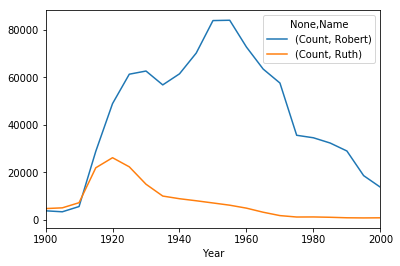

In [2]:
# 1) пункт
DATA_DIR = "names" 
names_by_year = {}

for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_DIR, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
names_all.tail(10)
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

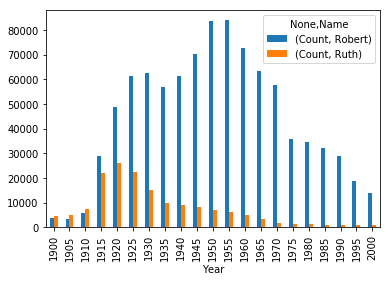

In [3]:
# 2) пункт
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [15]:
# 3 пункт
path_to_file = os.path.join(os.getcwd(), 'names/yob1950.txt' )
names_all = pd.read_csv(path_to_file, names = ['Name','Gender','Count'])
search_to_file = os.path.join(os.getcwd(), 'empty.txt' )
search_name_all = pd.read_csv(search_to_file, names = ['Name','Gender','Count'])
for item in names_all.get('Name'):
    for one_item in item:
        if one_item == 'R':
            search_name = names_all[names_all.Name == item]
            search_name_all = pd.concat([search_name_all, search_name])
              
search_name_all = search_name_all.groupby('Name').sum().sort_values(by='Count', ascending = False).head(10)
search_name_all



,Gender,Count
Name,,
Robert,FMFM,167556
Richard,FMFM,102222
Ronald,FMFM,59970
Roger,FMFM,25156
Raymond,FMFM,22436
Rebecca,FMFM,18886
Ruth,FMFM,14276
Roy,FMFM,12982
Rita,FMFM,12878


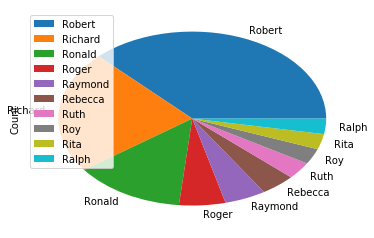

In [17]:
search_name_all.plot.pie(y='Count')

In [111]:
names = pd.read_csv('{}/yob2000.txt'.format(DATA_DIR), names=['Name','Gender','Count'])
names.head(10)

,Name,Gender,Count
0,Emily,F,25953
1,Hannah,F,23078
2,Madison,F,19967
3,Ashley,F,17996
4,Sarah,F,17691
5,Alexis,F,17628
6,Samantha,F,17265
7,Jessica,F,15706
8,Elizabeth,F,15092
9,Taylor,F,15077


In [41]:
# 4 пункт 
DATA_DIR = "names" 
names_by_year = {}
list_len = []
list_year = []



for year in range(1900, 2001, 5):  
    list_year.append(year)
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_DIR, year),
        names = ['Name','Gender','Count']                                 
    )
    names_by_year[year]['Len'] = names_by_year[year].apply(lambda row: len(row.Name) - len([1 for x in row.Name if x in ['a', 'e', 'i', 'o', 'u','y','A','E', 'I', 'O', 'U', 'Y']]), axis=1)
    names_by_year[year] = pd.concat(names_by_year, names=['Year', 'Pos'])
    names_by_year[year] = names_by_year[year].groupby([names_by_year[year].index.get_level_values(0)]).sum()
names_by_year[year]['Year'] = list_year
names_by_year[year]

# print (list_year)
    



,Count,Len,Year
Year,,,
1900,450296,11786,1900
1905,874233,23414,1905
1910,1915246,50210,1910
1915,5072247,116559,1915
1920,10574727,238007,1920
1925,21220083,475842,1925
1930,42329943,948895,1930
1935,84526346,1895339,1935
1940,169265482,3790717,1940


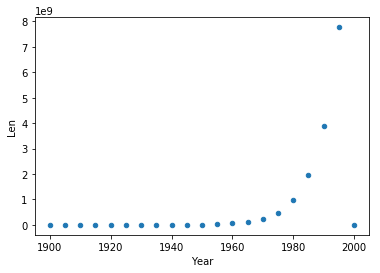

In [42]:
names_by_year[year].plot.scatter(x='Year', y='Len')